<a href="https://colab.research.google.com/github/shadowbladk/oil-prediction/blob/main/Oil_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/OilPrediction/BrentOilPrices.csv')
df.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

# Handle missing values
df.dropna(inplace=True)  # or fillna with suitable values

# Check and handle duplicates
duplicates = df[df.duplicated()]
print(duplicates)

# Handle outliers
from scipy.stats.mstats import winsorize
df['Price'] = winsorize(df['Price'], limits=[0.05, 0.05])  # Adjust the limits according to your data

# Sort data by Date
df.sort_values('Date', inplace=True)

# Set Date as Index
df.set_index('Date', inplace=True)

Empty DataFrame
Columns: [Date, Price]
Index: []


In [5]:
X = df.index.values.reshape(-1, 1)  # Use the date as the feature
y = df['Price']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create polynomial features
polynomial_features = PolynomialFeatures(degree=2)  # Adjust the degree as necessary
X_poly = polynomial_features.fit_transform(X_train)

# Fit the model
model = LinearRegression()
model.fit(X_poly, y_train)

LinearRegression()

In [7]:
X_test_poly = polynomial_features.transform(X_test)

# Make predictions
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 485.60855256480005
R2 Score: 0.5112123980995111


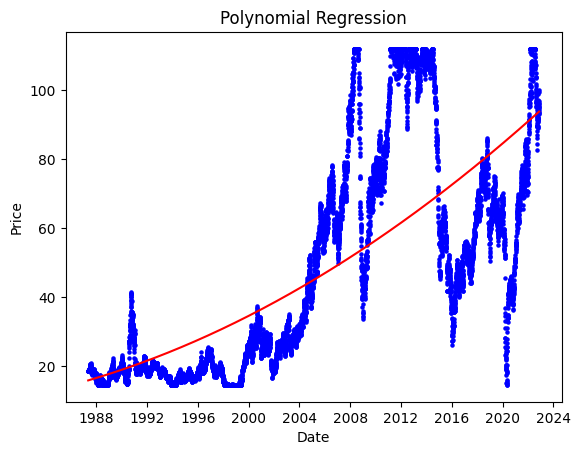

In [8]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue', s=5)
plt.plot(X, model.predict(polynomial_features.transform(X)), color='red')
plt.title('Polynomial Regression')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [9]:
X_poly = polynomial_features.fit_transform(X)

# Fit the model on the entire dataset
model.fit(X_poly, y)

LinearRegression()

In [10]:
import numpy as np

future_dates = np.array(pd.date_range(start='2024-01-01', end='2030-01-01', freq='MS'))
future_dates_poly = polynomial_features.transform(future_dates.reshape(-1, 1))

In [11]:
future_predictions = model.predict(future_dates_poly)

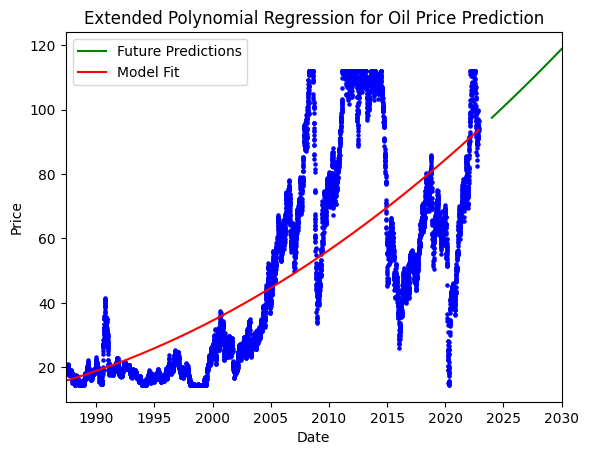

In [12]:
plt.scatter(X, y, color='blue', s=5)  # Adjust the size as per your requirement
plt.plot(future_dates, future_predictions, color='green', label='Future Predictions')
plt.plot(X, model.predict(X_poly), color='red', label='Model Fit')
plt.title('Extended Polynomial Regression for Oil Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xlim([X[0], future_dates[-1]])  # Set the x-axis limits to cover the entire date range
plt.legend()
plt.show()

In [13]:
import numpy as np

# Normalize the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Price'].values.reshape(-1, 1))

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[0:train_size, :]
test_data = scaled_data[train_size:len(scaled_data), :]

# Create training and testing datasets
def create_dataset(dataset, time_step=1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        data_X.append(a)
        data_Y.append(dataset[i + time_step, 0])
    return np.array(data_X), np.array(data_Y)

time_step = 100  # You can adjust this based on your data
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [14]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=64)


Epoch 1/100
112/112 [==============================] - 28s 189ms/step - loss: 0.0072
Epoch 2/100
112/112 [==============================] - 21s 192ms/step - loss: 9.2964e-04
Epoch 3/100
112/112 [==============================] - 21s 190ms/step - loss: 7.0284e-04
Epoch 4/100
112/112 [==============================] - 20s 176ms/step - loss: 6.2822e-04
Epoch 5/100
112/112 [==============================] - 22s 196ms/step - loss: 6.0316e-04
Epoch 6/100
112/112 [==============================] - 20s 176ms/step - loss: 5.9697e-04
Epoch 7/100
112/112 [==============================] - 21s 191ms/step - loss: 5.1853e-04
Epoch 8/100
112/112 [==============================] - 20s 176ms/step - loss: 4.4440e-04
Epoch 9/100
112/112 [==============================] - 19s 173ms/step - loss: 4.5694e-04
Epoch 10/100
112/112 [==============================] - 22s 194ms/step - loss: 4.8083e-04
Epoch 11/100
112/112 [==============================] - 20s 182ms/step - loss: 4.3547e-04
Epoch 12/100
112/112 [=

In [15]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Evaluate the model
train_score = np.sqrt(mean_squared_error(y_train, train_predict[:, 0]))
test_score = np.sqrt(mean_squared_error(y_test, test_predict[:, 0]))
print(f'Train Score: {train_score}, Test Score: {test_score}')


54/54 [==============================] - 3s 48ms/step
Train Score: 55.97030526670458, Test Score: 66.85880642488888


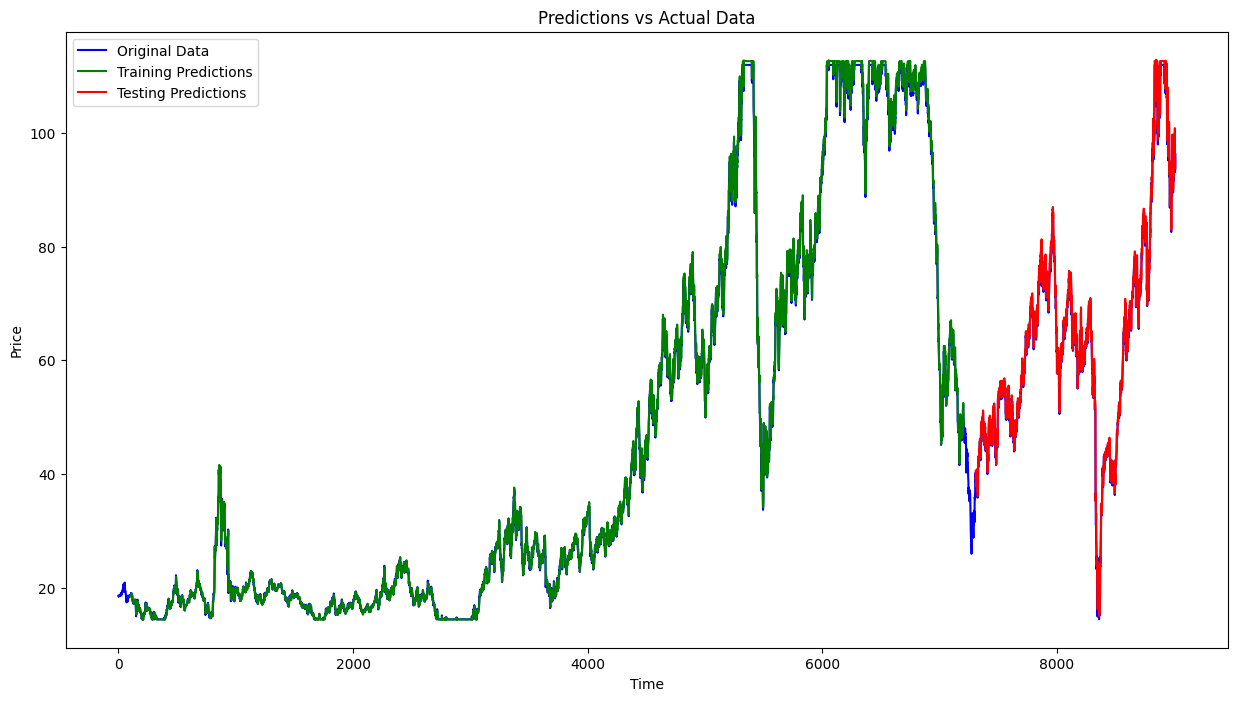

In [16]:
import matplotlib.pyplot as plt

# Shift train predictions for plotting
train_predict_plot = np.empty_like(scaled_data)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_step:len(train_predict) + time_step, :] = train_predict

# Shift test predictions for plotting
test_predict_plot = np.empty_like(scaled_data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (time_step * 2) + 1:len(scaled_data) - 1, :] = test_predict

# Plot baseline and predictions
plt.figure(figsize=(15, 8))
plt.plot(scaler.inverse_transform(scaled_data), label='Original Data', color='blue')
plt.plot(train_predict_plot, label='Training Predictions', color='green')
plt.plot(test_predict_plot, label='Testing Predictions', color='red')
plt.title('Predictions vs Actual Data')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
